## Computing and Saving Spectrograms 

In [2]:
# === CONFIGURATION ===
DATASET_ROOT = "/media/gabriel/'500 BKP'/datasets/VOICES-DataSet/VOiCES_devkit"
OUT_DIR = "/media/gabriel/'500 BKP'/datasets/VOICES-DataSet/preprocessed_complex"

N_FFT = 512
HOP_LENGTH = 128
WIN_LENGTH = 512
SAMPLE_RATE = 16000

In [3]:
!python ../src/preprocess.py {DATASET_ROOT} {OUT_DIR} {N_FFT} {HOP_LENGTH} {WIN_LENGTH}

[test] Processing speakers: 100%|█████████████| 100/100 [00:21<00:00,  4.62it/s]


## Analyzing Spectrograms

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
import os
import sys

sys.path.append("..")

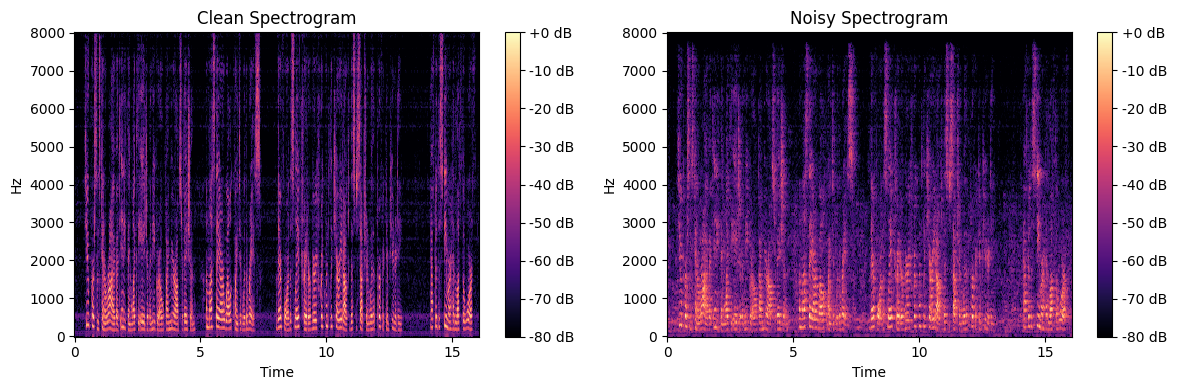

In [10]:
from src.utils import reconstruct_waveform,  plot_spectrograms

OUT_DIR = "/media/gabriel/500 BKP/datasets/VOICES-DataSet/preprocessed"
ROOM_ID = 'rm1'
ROOM_NOISE = 'babb'

# Set paths to a clean and noisy pair
clean_name = "sp0032-ch004137-sg0007"

clean_path = f"{OUT_DIR}/train/clean/{clean_name}.npy"
noisy_path = f"{OUT_DIR}/train/noisy/{clean_name}__{ROOM_ID}-{ROOM_NOISE}-mc01-stu-clo-dg150.npy"

clean_mag = np.load(clean_path)
noisy_mag = np.load(noisy_path)

plot_spectrograms(clean_mag, noisy_mag)

In [13]:
# Reconstruct waveform from spectrograms
clean_audio = reconstruct_waveform(clean_mag)
noisy_audio = reconstruct_waveform(noisy_mag)

# Listen
print("🎧 Noisy Audio")
ipd.display(ipd.Audio(noisy_audio, rate=16000))

print("🎧 Clean Audio (Reference)")
ipd.display(ipd.Audio(clean_audio, rate=16000))

🎧 Noisy Audio


🎧 Clean Audio (Reference)
